### Z-SCORE METHOD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import zscore

In [ ]:
data = {
    'Value': [10, 12, 12, 13, 12, 11, 14, 100, 10, 12, 12, 13, 12, 11, 14, 10, 12, 12, 13, 12, 11, 14, 50]
}
df = pd.DataFrame(data)
df

In [ ]:
df['Z-Score'] = zscore(df['Value'])

In [ ]:
df

In [ ]:
threshold = 3

In [ ]:
df['Outlier'] = np.abs(df['Z-Score']) > threshold

In [ ]:
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Value'])
plt.title('Before Removing Outliers')

In [ ]:
df_clean = df[df['Outlier'] == False]

In [ ]:
df_clean

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['Value'])
plt.title('After Removing Outliers')

### IQR METHOD

In [ ]:
data = {
    'Value': np.append(np.random.normal(50, 10, 100), [150, 200, 250, 300, 350, 400])
}
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
sns.boxplot(df["Value"])

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

In [ ]:
upper_bound

In [ ]:
df['Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

In [ ]:
df

In [ ]:
df_clean = df[df['Outlier'] == False]

In [ ]:
sns.boxplot(df_clean["Value"])

### PERCENTILE METHOD

In [ ]:
data = np.concatenate([np.random.normal(loc=0, scale=1, size=90), np.array([10, 12, 15, -8, -10])])

df = pd.DataFrame(data, columns=['Value'])

In [ ]:
df

In [ ]:
sns.boxplot(df["Value"])

In [ ]:
lower_bound = np.percentile(df["Value"], 5)
upper_bound = np.percentile(df["Value"], 95)

In [ ]:
lower_bound1 = df['Value'].quantile(0.05)
upper_bound2 = df['Value'].quantile(0.95)

In [ ]:
lower_bound

In [ ]:
lower_bound1

In [ ]:
df['Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

In [ ]:
df

In [ ]:
cleaned_df = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

In [ ]:
sns.boxplot(cleaned_df["Value"])

### WINSORIZATION

In [2]:
data = np.concatenate([np.random.normal(loc=0, scale=1, size=50),
                       np.array([10, 12, 15, -8, -10])]) 

df = pd.DataFrame(data, columns=['Value'])

In [3]:
df

,Value
0,-0.311066
1,0.739003
2,-0.494620
3,1.262769
4,0.873707
5,-0.656549
6,-0.717047
7,-0.162388
8,0.988187
9,0.278472


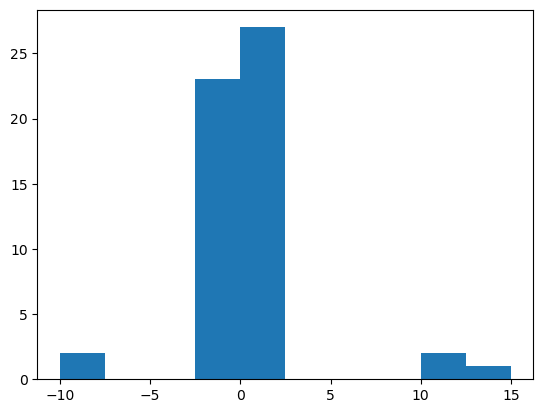

In [4]:
plt.hist(df['Value'])
plt.show()

In [5]:
lower_bound = np.percentile(df["Value"], 5)
upper_bound = np.percentile(df["Value"], 95)

In [6]:
lower_bound

-1.7320448040936398

In [7]:
upper_bound

4.219267113668208

In [8]:
df['Winsorized'] = df['Value'].clip(lower=lower_bound, upper=upper_bound)

In [9]:
df

,Value,Winsorized
0,-0.311066,-0.311066
1,0.739003,0.739003
2,-0.494620,-0.494620
3,1.262769,1.262769
4,0.873707,0.873707
5,-0.656549,-0.656549
6,-0.717047,-0.717047
7,-0.162388,-0.162388
8,0.988187,0.988187
9,0.278472,0.278472


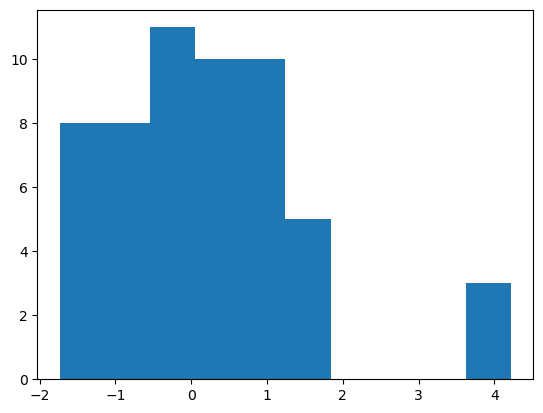

In [10]:
plt.hist(df['Winsorized'])
plt.show()

<Axes: >

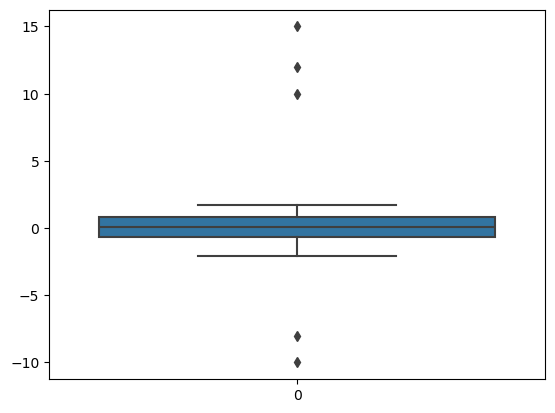

In [11]:
sns.boxplot(df['Value'])

<Axes: >

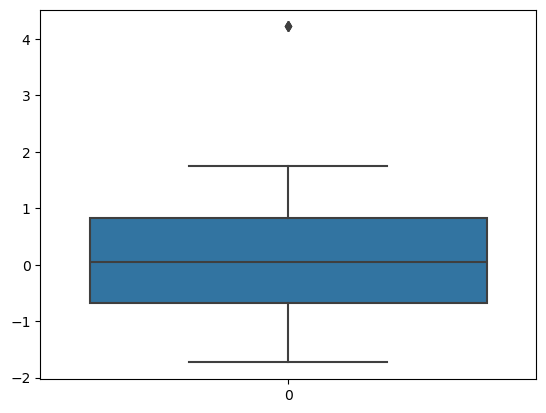

In [12]:
sns.boxplot(df["Winsorized"])